<a href="https://colab.research.google.com/github/quickgrid/CodeLab/blob/master/computer_vision/Yolov4_Darknet_Crop_Bounding_Box_Images_from_Detections_Folder_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convenient functions for YOLO v4 based on AlexeyAB Darknet Yolo

Detail: [darknet.gong.im](darknet.gong.im)

In case any problems, please feel free to let me know.

Email: vincent.gong7@gmail.com

### Steps:

1.   Clone the repository.
2.   Decompress the Weight file.
3.   Make.
4.   Run the command.

---

Let's go step by step.

**1. The first step is to clone the repository.**

The link is: https://github.com/vincentgong7/VG_AlexeyAB_darknet.git

In [1]:
!git clone https://github.com/vincentgong7/VG_AlexeyAB_darknet.git

Cloning into 'VG_AlexeyAB_darknet'...
remote: Enumerating objects: 14781, done.
remote: Total 14781 (delta 0), reused 0 (delta 0), pack-reused 14781
Receiving objects: 100% (14781/14781), 245.67 MiB | 24.69 MiB/s, done.
Resolving deltas: 100% (10454/10454), done.


**2. Next, we move to the weight folder and decompress the weight file.**

In [2]:
cd /content/VG_AlexeyAB_darknet

/content/VG_AlexeyAB_darknet


In [3]:
cd weights/

/content/VG_AlexeyAB_darknet/weights


***We use the 7z command to decompress the weight file.***

In [4]:
!7z x yolov4.weights.7z.001


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 94371840 bytes (90 MiB)

Extracting archive: yolov4.weights.7z.001
  0% 1 Open           --
Path = yolov4.weights.7z.001
Type = Split
Physical Size = 94371840
Volumes = 3
Total Physical Size = 236899177
----
Path = yolov4.weights.7z
Size = 236899177
--
Path = yolov4.weights.7z
Type = 7z
Physical Size = 236899177
Headers Size = 138
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      1%      2% - yolov4.weights                       3% - yolov4.weights                       5% - yolov4.weights                       6% - yolov4.weights    

***Come back to the repository root folder.***

In [5]:
cd ..

/content/VG_AlexeyAB_darknet


## Compile with GPU and OpenCV

In [6]:
!nvidia-smi

Thu May  6 16:04:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
# change makefile to have GPU and OPENCV enabled
%cd '/content/VG_AlexeyAB_darknet'
#!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/VG_AlexeyAB_darknet


In [29]:
# TODO CHECK HOW TO REPLACE NEWLINE
# UNTIL THEN MANUALLY REMOVE
#!sed -i 's/-gencode arch=compute_30,code=sm_30 \\//' Makefile

**3. "make"**

In [25]:
%cd '/content/VG_AlexeyAB_darknet'

/content/VG_AlexeyAB_darknet


**Remove `-gencode arch=compute_30,code=sm_30 \` from `MAKEFILE`**

In [26]:
!make

Makefile:21: *** missing separator.  Stop.


**4. Run the sample command**

After that, you can check the exported files in folder: ***VG_AlexeyAB_darknet/output/***

In [12]:
!pwd

/content/VG_AlexeyAB_darknet


In [13]:
!./darknet detector batch cfg/coco.data cfg/yolov4.cfg weights/yolov4.weights io_folder sample_imgs/ output/ -out output/result.json -ext_output > output/result.txt

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           

In [14]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


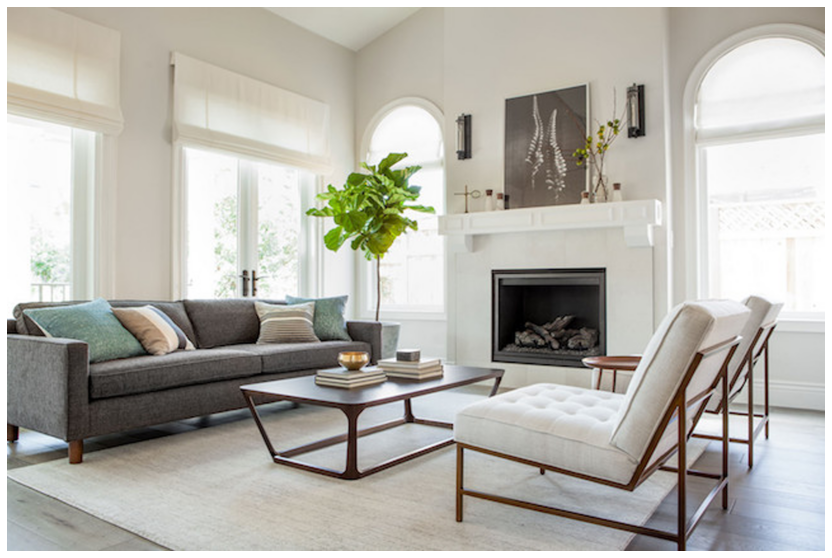

In [15]:
imShow('/content/VG_AlexeyAB_darknet/sample_imgs/1.jpg')

In [16]:
crop_out_location = '/content/cropped/'

In [17]:
!mkdir "$crop_out_location"

In [18]:
print(crop_out_location)

/content/cropped/


## Read json and images to get bounding box locations and crop them then run secondary model for detection on cropped parts

8
sample_imgs/2.jpg
/content/cropped/0_0.jpg
/content/cropped/0_1.jpg
/content/cropped/0_2.jpg
/content/cropped/0_3.jpg
/content/cropped/0_4.jpg
/content/cropped/0_5.jpg
/content/cropped/0_6.jpg
/content/cropped/0_7.jpg


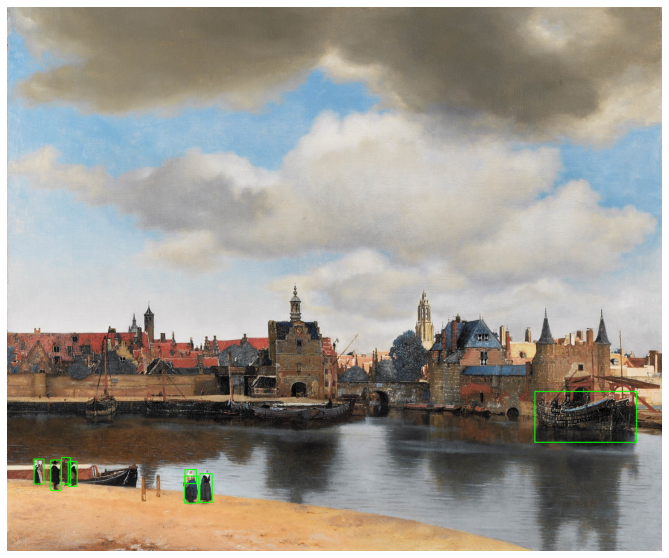

11
sample_imgs/1.jpg
/content/cropped/1_0.jpg
/content/cropped/1_1.jpg
/content/cropped/1_2.jpg
/content/cropped/1_3.jpg
/content/cropped/1_4.jpg
/content/cropped/1_5.jpg
/content/cropped/1_6.jpg
/content/cropped/1_7.jpg
/content/cropped/1_8.jpg
/content/cropped/1_9.jpg
/content/cropped/1_10.jpg


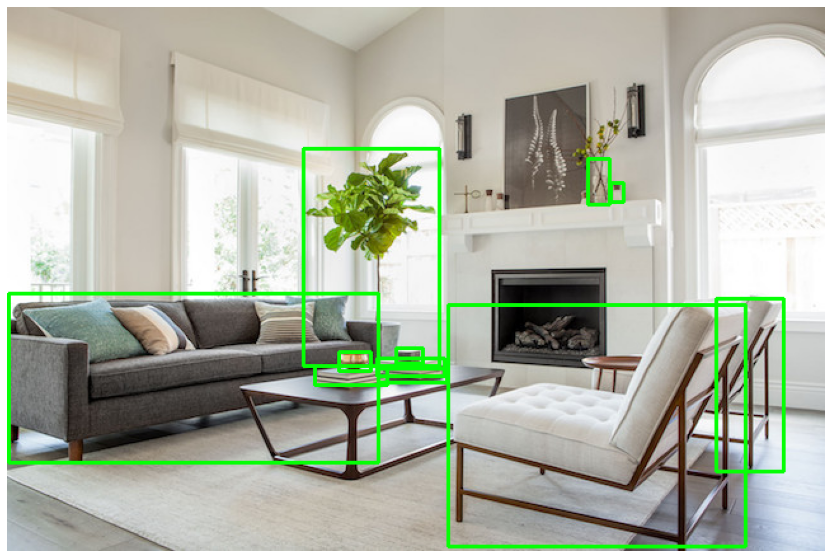

In [19]:
# TODO: Use different color for classes and write their labels

import os

import cv2
import json
import matplotlib.pyplot as plt


with open("/content/VG_AlexeyAB_darknet/output/result.json", "r") as read_file:
    data = json.load(read_file)

    data_len = len(data)
    #print(len(data))

    for i in range(data_len):
      objs = data[i]['objects']
      detection_count = len(objs)
      print(detection_count)

      #print(objs[5])

      print(data[i]['filename'])
      im1 = cv2.imread(data[i]['filename'])
      im_out = im1.copy()

      # Get the number of detected objects
      for j in range(detection_count):
        obj_details = objs[j]
        #print(obj_details)

        rel_coords = obj_details['relative_coordinates']
        #print(rel_coords)

        # Get single location left, top, right, bottom from json
        l = rel_coords['left_x']
        t = rel_coords['top_y']
        r = l + rel_coords['width']
        b = t + rel_coords['height']

        # Crop image based on detection
        im_crop = im1[t:b, l:r]
        im_write_path = os.path.join(crop_out_location, str(i) + '_' + str(j) + '.jpg')
        print(im_write_path)
        cv2.imwrite(im_write_path, im_crop)

        # Run secondary detection on the cropped image to draw on `im_out`
        # (5, 10),(20, 30)
        # (l + 5, t + 10), (r + 20, b + 30)
        # TODO: RUN 2nd model here and draw the secondary detection on `im_out`.


        # Draw on the output image
        im_out = cv2.rectangle(im_out, (l, t), (r, b), (5, 255, 5), 2)

      fig = plt.gcf()
      fig.set_size_inches(18, 10)
      plt.axis("off")
      plt.imshow(cv2.cvtColor(im_out, cv2.COLOR_BGR2RGB))
      plt.show()


